# Load Data

## Import Packages

In [1]:
import sys
import dotenv 
import os
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import osmnx as ox
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pyogrio import list_layers


dotenv.load_dotenv()  
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.utils import rename_traffic_columns, download_and_load_data_full_year, GeoStationFilter
from scripts.data_downloader import DataDownloader  


import numpy as np


import warnings
warnings.filterwarnings("ignore")

# Fetch Road Traffic Count data

## Emilia-Romagna Regional Traffic Data 

In [2]:
downloader = DataDownloader('../data/DGCTA - Flussi di Traffico.csv')


Loading data from: ../data/DGCTA - Flussi di Traffico.csv
Successfully loaded 196 records


In [3]:
downloader.data_map[2020,1]   # shows info about the data for December 2009
# generally it contains data after 2009, 1

{'dataset_id': 'DS-1944',
 'url': 'https://rerdatahub.blob.core.windows.net/open-datahub/DS-1944/2020/01_Gennaio_2020.csv',
 'frequency': 'SETTIMANALE',
 'status_code': 'S',
 'timestamp': '2024-08-02 17:26:08',
 'availability': 'OPEN'}

In [ ]:
df = download_and_load_data_full_year(year=2020, month=1, downloader=downloader)
    

File already exists. Skipping download: ../data/regional_traffic_data_downloads/01_Gennaio_2020.csv
Data loaded successfully. Shape: (489454, 8)


In [5]:
df.head()

Year   Month         Day HourMinute  MTSStationID  DirectionCode  \
0  2020  202001  20200101.0      00:00           6.0            0.0   
1  2020  202001  20200101.0      00:00           6.0            1.0   
2  2020  202001  20200101.0      00:00           7.0            0.0   
3  2020  202001  20200101.0      00:00           7.0            1.0   
4  2020  202001  20200101.0      00:00           9.0            1.0   

   VehicleType  TransitCount  
0          2.0           4.0  
1          2.0           2.0  
2          2.0           2.0  
3          2.0           4.0  
4          2.0           1.0

In [6]:
df.HourMinute.unique()

array(['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30',
       '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15',
       '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00',
       '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45',
       '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30',
       '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15',
       '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00',
       '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45',
       '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30',
       '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15',
       '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00',
       '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45',
       '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30',
       '22:45', '23:00', '23:15', '23:30', '23:45', nan], dtype=object)

### Find the monitoring stations inside Bologna Province only

In [7]:
filter_name = "Bologna, Italy"        # Sub-region filter
place_name = "Emilia-Romagna, Italy"  # Main region
xlsx_file = '../data/monitoring_stations.xlsx'

filter_tool = GeoStationFilter(xlsx_file)
filter_tool.filter_by_place(filter_name)

Loaded 292 stations from '../data/monitoring_stations.xlsx'.


NAME      LAT_MM1     LONG_MM1  LAT_WGS84  LONG_WGS84  \
48    152  4929067.228  1679817.955  44.492381   11.261233   
224   502  4932823.936  1678273.253  44.526558   11.243117   

                      geometry  bbox_north  bbox_south  bbox_east  bbox_west  \
48   POINT (11.26123 44.49238)   44.556094   44.421053  11.433608  11.229621   
224  POINT (11.24312 44.52656)   44.556094   44.421053  11.433608  11.229621   

     ...  osm_id       lat        lon     class            type place_rank  \
48   ...   43172  44.49382  11.342633  boundary  administrative         16   
224  ...   43172  44.49382  11.342633  boundary  administrative         16   

    importance  addresstype     name                    display_name  
48     0.72895         city  Bologna  Bologna, Emilia-Romagna, Italy  
224    0.72895         city  Bologna  Bologna, Emilia-Romagna, Italy  

[2 rows x 22 columns]

In [8]:
# With buffer
filter_tool.filter_by_place(filter_name, buffer_km=2.5)

NAME      LAT_MM1     LONG_MM1  LAT_WGS84  LONG_WGS84  \
48    152  4929067.228  1679817.955  44.492381   11.261233   
50    154  4921128.171  1686727.084  44.419217   11.345198   
52    156  4930637.206  1694669.570  44.502653   11.448451   
53    157  4934675.882  1693670.821  44.539247   11.437413   
55    160  4935885.299  1680456.550  44.553554   11.271642   
64    177  4928087.451  1693464.135  44.480044   11.432347   
224   502  4932823.936  1678273.253  44.526558   11.243117   
289   683  4934027.548  1693968.102  44.533336   11.440908   

                      geometry  
48   POINT (11.26123 44.49238)  
50   POINT (11.34520 44.41922)  
52   POINT (11.44845 44.50265)  
53   POINT (11.43741 44.53925)  
55   POINT (11.27164 44.55355)  
64   POINT (11.43235 44.48004)  
224  POINT (11.24312 44.52656)  
289  POINT (11.44091 44.53334)

In [9]:
# show the current map with the filtered stations
# filter_tool.show_map(place_name, filter_name)

In [10]:
map = filter_tool.show_buffer_map(place_name, filter_name, 2.5)

Found 8 stations with the buffer zone of 2.5km around Bologna, Italy.


## Bologna City Traffic Count Data

In [11]:
df = pd.read_csv('../data/bologna_traffic_2020.csv',sep=';')

In [12]:
df.info()
# Livello is lane count, 1 is 1 lane, 2 is 2 lanes, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284787 entries, 0 to 284786
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       284787 non-null  object 
 1   codice spira               284787 non-null  object 
 2   00:00-01:00                284787 non-null  int64  
 3   01:00-02:00                284787 non-null  int64  
 4   02:00-03:00                284787 non-null  int64  
 5   03:00-04:00                284787 non-null  int64  
 6   04:00-05:00                284787 non-null  int64  
 7   05:00-06:00                284787 non-null  int64  
 8   06:00-07:00                284787 non-null  int64  
 9   07:00-08:00                284787 non-null  int64  
 10  08:00-09:00                284787 non-null  int64  
 11  09:00-10:00                284787 non-null  int64  
 12  10:00-11:00                284787 non-null  int64  
 13  11:00-12:00                28

In [13]:
df['codice spira'].isna().sum()  # check for missing values in 'codice spira'

0

In [14]:
df.nunique()/df.shape[0]

data                         0.001285
codice spira                 0.002816
00:00-01:00                  0.004456
01:00-02:00                  0.004021
02:00-03:00                  0.003617
03:00-04:00                  0.003385
04:00-05:00                  0.003413
05:00-06:00                  0.003311
06:00-07:00                  0.003782
07:00-08:00                  0.007399
08:00-09:00                  0.008571
09:00-10:00                  0.007434
10:00-11:00                  0.006991
11:00-12:00                  0.006956
12:00-13:00                  0.007195
13:00-14:00                  0.007163
14:00-15:00                  0.007188
15:00-16:00                  0.007451
16:00-17:00                  0.007795
17:00-18:00                  0.008543
18:00-19:00                  0.008649
19:00-20:00                  0.008076
20:00-21:00                  0.006637
21:00-22:00                  0.005278
22:00-23:00                  0.004983
23:00-24:00                  0.004969
id_uni      

In [15]:
df_unique_address = df.drop_duplicates(subset=['geopoint']).copy()
gdf = gpd.GeoDataFrame(df_unique_address, geometry=gpd.points_from_xy(df_unique_address.longitudine, df_unique_address.latitudine), crs='EPSG:4326')

In [16]:
bologna_gdf = ox.geocode_to_gdf('Bologna, Italy')

In [17]:
## Along with the regional traffic data map, we have 
m = gdf.explore(m=map, tooltip=['id_uni', 'direzione','Livello'])
bologna_gdf.explore(m=m, color='red',fill=False, tooltip=['name'])

In [18]:
## maximum unique sensors, geopoints, and ids
df['codice spira'].nunique(), df['geopoint'].nunique(), df['id_uni'].nunique()

(802, 795, 795)

In [19]:
# na counts for each id_uni
df_id_uni_counts = df.drop_duplicates(subset=['id_uni','data'])['id_uni'].value_counts().reset_index()
df_id_uni_counts['na_count'] = 366 - df_id_uni_counts['count']
df_id_uni_counts['na_pct'] = df_id_uni_counts['na_count'] / 366 * 100  

In [20]:
# map with the stations with missing data
na_ids = df['id_uni'].value_counts().nsmallest(20).iloc[:].index

# missing readings from stations
df_na_stations =  df.drop_duplicates(subset=['id_uni']).loc[df['id_uni'].isin(na_ids)].copy()
df_non_na_stations = df.drop_duplicates(subset=['id_uni']).loc[~df['id_uni'].isin(na_ids)].copy()
df_na_stations = df_na_stations.merge(df_id_uni_counts, on='id_uni', how='inner')

gdf = gpd.GeoDataFrame(df_na_stations, geometry=gpd.points_from_xy(df_na_stations.longitudine, df_na_stations.latitudine), crs='EPSG:4326')
gdf_non_na = gpd.GeoDataFrame(df_non_na_stations, geometry=gpd.points_from_xy(df_non_na_stations.longitudine, df_non_na_stations.latitudine), crs='EPSG:4326')

m = bologna_gdf.explore(fill=False, color='blue', tooltip=['name'])
m1 = gdf.explore(m=m, tooltip=['id_uni', 'direzione','Livello', 'na_count', 'na_pct'], color='red')
gdf_non_na.explore(m=m1, tooltip=['id_uni', 'direzione','Livello'], color='green')

In [21]:
df_nna = df[~df['id_uni'].isin(na_ids)].copy()
df_nna.shape

(283297, 45)

In [75]:
time_series = df.melt(
    id_vars=['data', 'id_uni', 'codice spira','codice via','Livello','direzione'],
    value_vars=[col for col in df.columns if '-' in col and ':' in col],
    var_name='time_interval',
    value_name='traffic'
)


In [76]:
time_series.head()

data  id_uni    codice spira  codice via  Livello direzione  \
0  2020-09-14     259   4.55 4.55 6 1     21350.0        1         E   
1  2020-09-14     640   4.65 4.98 6 1     32510.0        1        NE   
2  2020-09-14     715   4.72 4.72 2 1     58600.0        1        NE   
3  2020-09-14     582  4.84 0.127 6 1     58600.0        1        SO   
4  2020-09-14     716   4.86 4.16 8 1     37700.0        1         S   

  time_interval  traffic  
0   00:00-01:00       77  
1   00:00-01:00       24  
2   00:00-01:00      118  
3   00:00-01:00      165  
4   00:00-01:00       52

In [77]:
# Convert to datetime
time_series['start_time'] = time_series['time_interval'].str.split('-').str[0]

In [ ]:
time_series['datetime'] = pd.to_datetime(
    time_series['data'].str.cat(time_series['start_time'], sep=' '),
    format='%Y-%m-%d %H:%M'
)

In [ ]:
time_series.head()

data  id_uni    codice spira  codice via  Livello time_interval  \
0  2020-09-14     259   4.55 4.55 6 1     21350.0        1   00:00-01:00   
1  2020-09-14     640   4.65 4.98 6 1     32510.0        1   00:00-01:00   
2  2020-09-14     715   4.72 4.72 2 1     58600.0        1   00:00-01:00   
3  2020-09-14     582  4.84 0.127 6 1     58600.0        1   00:00-01:00   
4  2020-09-14     716   4.86 4.16 8 1     37700.0        1   00:00-01:00   

   traffic start_time   datetime  
0       77      00:00 2020-09-14  
1       24      00:00 2020-09-14  
2      118      00:00 2020-09-14  
3      165      00:00 2020-09-14  
4       52      00:00 2020-09-14

In [ ]:
# Final time-series DataFrame
time_series_df = time_series[['datetime', 'id_uni', 'codice spira', 'traffic','codice via','Livello']]


In [ ]:

# List of columns to exclude (hourly + temporal columns)
exclude_cols = [col for col in df.columns if '-' in col and ':' in col] + ['data', 'Giorno della settimana']

# Create metadata DF with unique sensor entries
metadata_df = df.drop(columns=exclude_cols).drop_duplicates()

# Add composite key column
metadata_df = metadata_df.assign(
    sensor_key=lambda x: x['id_uni'].astype(str) + '_' + x['codice spira']
)

# Verify results
print("Time Series DataFrame:")
print(time_series_df.head(4))
print("\nMetadata DataFrame:")
metadata_df[['id_uni', 'codice spira', 'Nome via', 'longitudine', 'latitudine','geopoint']].head()

Time Series DataFrame:
    datetime  id_uni    codice spira  traffic  codice via  Livello
0 2020-09-14     259   4.55 4.55 6 1       77     21350.0        1
1 2020-09-14     640   4.65 4.98 6 1       24     32510.0        1
2 2020-09-14     715   4.72 4.72 2 1      118     58600.0        1
3 2020-09-14     582  4.84 0.127 6 1      165     58600.0        1

Metadata DataFrame:


id_uni    codice spira            Nome via  longitudine  latitudine  \
0     259   4.55 4.55 6 1  VIA EMILIA LEVANTE    11.387160   44.478676   
1     640   4.65 4.98 6 1     VIA LUIGI LONGO    11.382223   44.464660   
2     715   4.72 4.72 2 1         VIA TOSCANA    11.366492   44.453891   
3     582  4.84 0.127 6 1         VIA TOSCANA    11.359239   44.448204   
4     716   4.86 4.16 8 1  VIA PIETRO MENGOLI    11.370737   44.487976   

                             geopoint  
0  44.4786757890555, 11.3871595080866  
1  44.4646604315862, 11.3822234288978  
2   44.4538910808342, 11.366492405612  
3  44.4482040481231, 11.3592392311116  
4  44.4879762053163, 11.3707371174361

In [ ]:
metadata_df.memory_usage().sum() / (1024*1024), time_series_df.memory_usage().sum() / (1024*1024), df.memory_usage().sum() / (1024*1024)

(0.1284942626953125, 312.87646865844727, 97.77398300170898)

## Fetch Data for Road Networks (Open Street Map)


In [10]:
# place_name = "Venezia, Lido, Venice, Venezia, Veneto, Italy"


In [12]:

# Configure OSMnx
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the Emilia-Romagna region (Italy)
# Define the Bologna region (Italy)
place_name = "Bologna, Italy"

try:
    # Download the road network for the region
    print(f"Downloading road network for {place_name}...")
    graph = ox.graph_from_place(place_name, network_type='all')
    
except Exception as e:
    print(f"An error occurred: {e}")

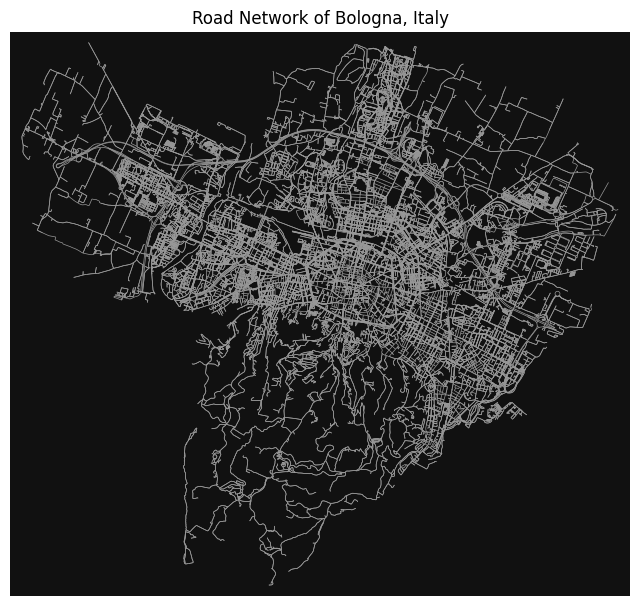

In [13]:

# Plot the network
fig, ax = ox.plot_graph(graph, 
                        node_size=0, 
                        edge_linewidth=0.5, 
                        show=False, 
                        close=False)

# Add title and show
plt.title(f"Road Network of {place_name}")
plt.show()


In [ ]:

# Save graph to file
ox.save_graph_shapefile(graph, filepath="../data/bologna_road_network")
print("Road network saved to '../data/bologna_road_network' folder")

# Get some basic stats about the network
stats = ox.basic_stats(graph)

In [4]:
# I want to load this graph into a GeoDataFrame for further analysis
graph_gdf = ox.graph_to_gdfs(graph, nodes=True, edges=True)


In [9]:
graph_gdf

(                     y          x  street_count            highway  ref  \
 osmid                                                                     
 6714648      44.524136  11.293704             3                NaN  NaN   
 6714672      44.516538  11.375632             3  motorway_junction  NaN   
 33344145     44.497690  11.350392             4                NaN  NaN   
 82550591     44.494209  11.346455             3                NaN  NaN   
 82550595     44.491467  11.346466             4    traffic_signals  NaN   
 ...                ...        ...           ...                ...  ...   
 12893718735  44.520023  11.340667             1                NaN  NaN   
 12893718738  44.520098  11.340381             1                NaN  NaN   
 12893718740  44.520035  11.340450             3                NaN  NaN   
 12893718743  44.519987  11.340474             4           crossing  NaN   
 12893718744  44.519959  11.340489             3                NaN  NaN   
 
          

In [11]:
stats

{'n': 31759,
 'm': 80626,
 'k_avg': 5.077363896848137,
 'edge_length_total': 4246795.014000039,
 'edge_length_avg': 52.67277322451862,
 'streets_per_node_avg': 2.895683113448156,
 'streets_per_node_counts': {0: 0,
  1: 5400,
  2: 255,
  3: 18492,
  4: 7493,
  5: 108,
  6: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1700305425233792,
  2: 0.008029220063604018,
  3: 0.5822601467300608,
  4: 0.2359331213199408,
  5: 0.003400610850467584,
  6: 0.0003463585125476243},
 'intersection_count': 26359,
 'street_length_total': 2424644.8559999806,
 'street_segment_count': 45926,
 'street_length_avg': 52.79460122806211,
 'circuity_avg': 1.1009920026121012,
 'self_loop_proportion': 0.0037016069328920436}

In [ ]:
# Convert the graph from latitude/longitude (WGS83) 
# to the right UTM coordinate reference system for the area selected
G_proj = ox.project_graph(graph)
gdfs = ox.graph_to_gdfs(G_proj)



In [15]:
gdfs[0].geometry.type.unique()


array(['Point'], dtype=object)

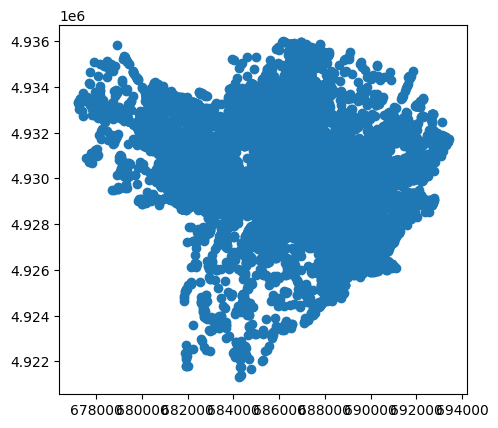

In [16]:
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False, nodes=True)
nodes_proj.plot()
plt.show()

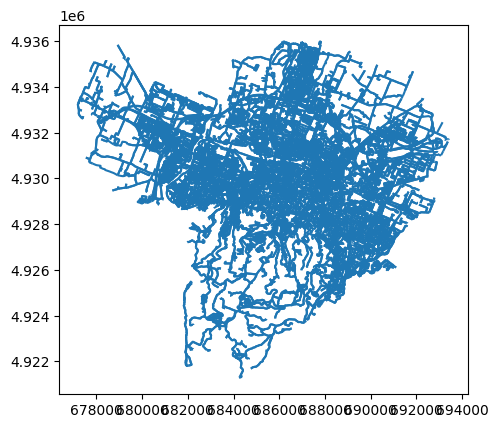

In [17]:
lines_proj = ox.graph_to_gdfs(G_proj, nodes=False)

lines_proj.plot()
plt.show()

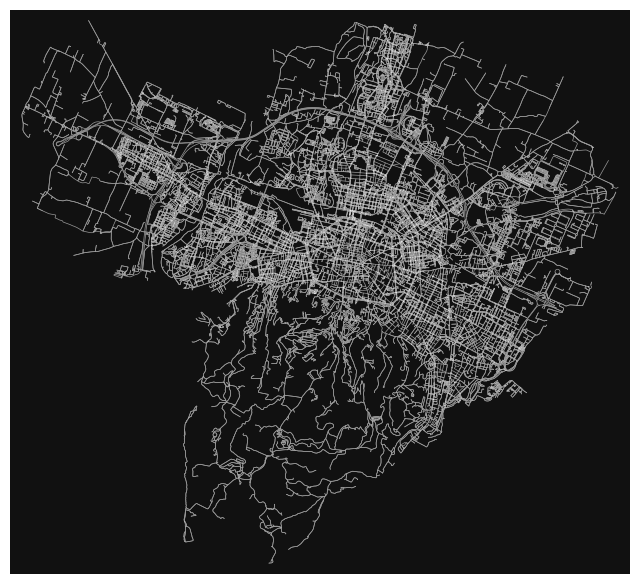

In [20]:
fig, ax = ox.plot_graph(graph, 
                        node_size=0.08, 
                        edge_linewidth=0.5, 
                        show=False, 
                        close=False)
plt.show()

In [15]:
edges = ox.graph_to_gdfs(graph,edges=True,nodes=False)


In [16]:
edges.head()

osmid  \
u        v          key                                      
82596491 2324314035 0                             27474209   
         926806953  0      [27474208, 27474209, 742213322]   
82596497 2507006493 0                            643536492   
         1268572050 0                            643536500   
         1841229459 0    [642916120, 705257675, 232364700]   

                                                                      name  \
u        v          key                                                      
82596491 2324314035 0                                   Località Pianerini   
         926806953  0    [Strada Provinciale Casteldelci, Località Pian...   
82596497 2507006493 0                                 Località Giardiniera   
         1268572050 0                                 Località Giardiniera   
         1841229459 0    [Località Giardiniera, Strada Provinciale Schi...   

                              highway  oneway reversed   length  \
u        v          key                                           
82596491 2324314035 0        tertiary   False    False   89.155   
         926806953  0        tertiary   False     True  589.962   
82596497 2507006493 0    unclassified   False     True   42.428   
         1268572050 0        tertiary   False     True  103.902   
         1841229459 0        tertiary   False    False  855.063   

                                                                  geometry  \
u        v          key                                                      
82596491 2324314035 0    LINESTRING (12.16659 43.79310, 12.16637 43.792...   
         926806953  0    LINESTRING (12.16659 43.79310, 12.16675 43.793...   
82596497 2507006493 0    LINESTRING (12.16002 43.78989, 12.15990 43.789...   
         1268572050 0    LINESTRING (12.16002 43.78989, 12.16013 43.789...   
         1841229459 0    LINESTRING (12.16002 43.78989, 12.15997 43.789...   

                        bridge   ref lanes junction maxspeed tunnel access  \
u        v          key                                                      
82596491 2324314035 0      NaN   NaN   NaN      NaN      NaN    NaN    NaN   
         926806953  0      yes   NaN   NaN      NaN      NaN    NaN    NaN   
82596497 2507006493 0      NaN   NaN   NaN      NaN      NaN    NaN    NaN   
         1268572050 0      NaN   NaN   NaN      NaN      NaN    NaN    NaN   
         1841229459 0      NaN  SP91   NaN      NaN      NaN    NaN    NaN   

                        width est_width area service  
u        v          key                               
82596491 2324314035 0     NaN       NaN  NaN     NaN  
         926806953  0     NaN       NaN  NaN     NaN  
82596497 2507006493 0     NaN       NaN  NaN     NaN  
         1268572050 0     NaN       NaN  NaN     NaN  
         1841229459 0     NaN       NaN  NaN     NaN

In [18]:
edges.columns
# [edges.travel_time == edges.travel_time.max()].name


Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'geometry',
       'bridge', 'ref', 'lanes', 'junction', 'maxspeed', 'tunnel', 'access',
       'width', 'est_width', 'area', 'service'],
      dtype='object')

## Accidents Data

In [12]:
gdf = gpd.read_file('../data/incidents.geojson')

In [13]:
gdf.head()

geo_point_2d  anno  \
0  {'lon': 11.30127868937376, 'lat': 44.508639792...  2020   
1  {'lon': 11.304474385703132, 'lat': 44.47301202...  2020   
2  {'lon': 11.36102987231796, 'lat': 44.460354688...  2020   
3  {'lon': 11.39393754102888, 'lat': 44.482488107...  2021   
4  {'lon': 11.348720962675374, 'lat': 44.48904907...  2021   

                                   nomezona  numquart              nomequart  \
0                               SANTA VIOLA        11  Borgo Panigale - Reno   
1                      SARAGOZZA - SAN LUCA        13      Porto - Saragozza   
2  VIA TOSCANA - S. RUFFILLO - MONTE DONATO        16                 Savena   
3                     FOSSOLO - DUE MADONNE        16                 Savena   
4                                   GALVANI        15          Santo Stefano   

  codzona  n_incident  totale_fer  totale_mor  n_pedoni_m  ...  n_motoc_f  \
0    None          24          29           1           0  ...         10   
1    None          56          63           1           0  ...         28   
2    None          22          25           0           0  ...         11   
3    None          39          46           0           0  ...         19   
4    None          49          53           0           0  ...         20   

   n_monop_m  n_monop_f  n_autist_m  n_autist_f  n_cicl_m  n_cicl_f  \
0          0          0           0          13         0         2   
1          0          0           0          10         1        12   
2          0          0           0           7         0         1   
3          0          1           0          15         0         5   
4          0          3           0           6         0         6   

   shape_leng    shape_area                                           geometry  
0         0.0  1.947286e+06  POLYGON ((11.31083 44.51134, 11.31082 44.51116...  
1         0.0  1.107967e+07  POLYGON ((11.31905 44.49696, 11.31914 44.49695...  
2         0.0  4.016413e+06  POLYGON ((11.35938 44.47460, 11.35941 44.47456...  
3         0.0  2.600538e+06  POLYGON ((11.39100 44.48910, 11.39114 44.48905...  
4         0.0  1.116791e+06  POLYGON ((11.34831 44.49350, 11.34883 44.49329...  

[5 rows x 22 columns]

In [54]:
gdf.nomequart.unique()


array(['Borgo Panigale - Reno', 'Porto - Saragozza', 'Savena',
       'Santo Stefano', 'Navile', 'San Donato - San Vitale'], dtype=object)

In [14]:
gdf.shape

(150, 22)

In [40]:
gdf.nomezona.nunique()

25

In [ ]:
gdf.drop_duplicates(subset=['geo_point_2d'])

In [ ]:
gdf.drop_duplicates(subset=['nomezona']).explore(color='red',
                    tiles='CartoDB positron', 
                    zoom=12, 
                  )

# 25 unique zones inside the bologna city

In [ ]:
### Insights
# - the dataset contains incidents from 2018 to 2023
# - it's an annually aggregated dataset, so each row represents the total number of incidents for that year in that zone
# - additionally the accident are aggregated by zone, which is a subdivision of the city of Bologna

In [ ]:
import pandas as pd


df = pd.read_excel('../data/Localization-accidents-stradali-2023.ods', engine='odf', sheet_name=0,  header=2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57561 entries, 0 to 57560
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               57561 non-null  int64  
 1   Unnamed: 1               57561 non-null  object 
 2   Unnamed: 2               57561 non-null  int64  
 3   Unnamed: 3               57561 non-null  object 
 4   Unnamed: 4               57561 non-null  object 
 5   Unnamed: 5               57561 non-null  object 
 6   Unnamed: 6               57561 non-null  float64
 7   Unnamed: 7               57561 non-null  float64
 8   INCIDENTI                57561 non-null  int64  
 9   INCIDENTI MORTALI        57561 non-null  int64  
 10  MORTI                    57561 non-null  int64  
 11  FERITI                   57561 non-null  int64  
 12  NVEI                     57561 non-null  int64  
 13  Inc2RMoto                57561 non-null  int64  
 14  IncMerci              

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/INCSTRAD_2023_IT/MICRODATI/INCSTRAD_Microdati_2023.txt', sep=None, engine='python', )


In [5]:
df.head()

anno  provincia  comune  giorno  organo_di_rilevazione  \
0    23         66       6       3                      4   
1    23         66       6       4                      4   
2    23         66       6       2                      4   
3    23         66       6       3                      4   
4    23         66       6       6                      4   

   localizzazione_incidente denominazione_della_strada  \
0                         1                              
1                         1                              
2                         1                              
3                         1                              
4                         1                              

  tronco_di_strada_o_autostrada  tipo_di_strada  pavimentazione  ...  \
0                                             2               1  ...   
1                                             2               1  ...   
2                                             2               1  ...   
3                                             2               1  ...   
4                                             2               1  ...   

   morti_entro_30_giorni  feriti  \
0                      0       1   
1                      0       1   
2                      0       5   
3                      0       1   
4                      0       1   

                                  descrizione_strada  Ora  chilometri  \
0                                                ...   13               
1                                                ...   13               
2                                                ...    8               
3                                                ...   18               
4                                                ...   14               

   ettometrica trimestre Cilindrata_A_Classi Cilindrata_B_Classi  \
0                      1               09                          
1                      1                                           
2                      1               08                  11      
3                      1               07                  08      
4                      1               11                  07      

  Cilindrata_C_Classi  
0                      
1                      
2                      
3                      
4               08     

[5 rows x 120 columns]

In [13]:
bologna_data = df[df['provincia'] == 37]

In [14]:
bologna_data.head()

anno  provincia  comune  giorno  organo_di_rilevazione  \
94903    23         37       5       3                      2   
94904    23         37      39       2                      2   
94905    23         37      39       4                      2   
94906    23         37       3       4                      2   
94907    23         37      47       7                      2   

       localizzazione_incidente denominazione_della_strada  \
94903                         4                              
94904                         1                              
94905                         1                              
94906                         2                              
94907                         1                              

      tronco_di_strada_o_autostrada  tipo_di_strada  pavimentazione  ...  \
94903                            12               3               1  ...   
94904                                             2               1  ...   
94905                                             2               1  ...   
94906                            12               2               1  ...   
94907                                             2               1  ...   

       morti_entro_30_giorni  feriti  \
94903                      0       2   
94904                      0       1   
94905                      0       1   
94906                      0       4   
94907                      0       3   

                                      descrizione_strada  Ora  chilometri  \
94903                                                ...   24               
94904                                                ...   11               
94905                                                ...    1               
94906                                                ...   24               
94907                                                ...   18               

       ettometrica trimestre Cilindrata_A_Classi Cilindrata_B_Classi  \
94903                      2                                           
94904                      1               09                          
94905                      1               07                          
94906                      3               10                  09      
94907                      1                                   09      

      Cilindrata_C_Classi  
94903                      
94904                      
94905                      
94906                      
94907                      

[5 rows x 120 columns]

In [17]:
# Comprehensive filter for Metropolitan City of Bologna
def filter_bologna_metropolitan(df):
    # List of all 55 municipalities in Bologna Metropolitan City
    # You can also filter by province code if all municipalities share it
    
    # Method 1: By province code (recommended)
    bologna_metro = df[df['provincia'].astype(str).str.strip() == '37']
    
    # Method 2: Verify with known Bologna municipalities
    # Check if 'Bologna' city appears in the results
    if '006' in bologna_metro['comune'].values:
        print("✓ Bologna city found in filtered data")
    
    return bologna_metro

# Apply filter
bologna_data = filter_bologna_metropolitan(df)

# Summary statistics
print(f"\nBologna Metropolitan City Accident Data:")
print(f"Total accidents: {len(bologna_data)}")
print(f"Years covered: {bologna_data['anno'].min()} - {bologna_data['anno'].max()}")
print(f"Municipalities: {bologna_data['comune'].nunique()}")


Bologna Metropolitan City Accident Data:
Total accidents: 4069
Years covered: 23 - 23
Municipalities: 55


In [25]:
bologna_data.tronco_di_strada_o_autostrada.unique()

array(['12', '  ', '03', '36', '34'], dtype=object)

In [35]:
df.localizzazione_incidente.unique()

array([1, 6, 4, 3, 5, 2, 9, 0, 8, 7])

## Weather Data

In [ ]:


class FerraraWeatherDataRetriever:
    def __init__(self, api_key):
        self.api_key = api_key
        self.city = 'Ferrara'
        self.country_code = 'IT'
        self.base_url = 'http://api.openweathermap.org/data/2.5/forecast'

    def get_coordinates(self):
        # Coordinates for Ferrara
        return {
            'lat': 44.8366,
            'lon': 11.6199
        }

    def fetch_weather_data(self, start_date, end_date):
        coords = self.get_coordinates()
        
        params = {
            'lat': coords['lat'],
            'lon': coords['lon'],
            'appid': self.api_key,
            'units': 'metric'  # Use Celsius
        }

        try:
            response = requests.get(self.base_url, params=params)
            response.raise_for_status()
            data = response.json()

            processed_data = []
            for entry in data['list']:
                timestamp = datetime.fromtimestamp(entry['dt'])
                
                if start_date <= timestamp <= end_date:
                    weather_entry = {
                        'timestamp': timestamp,
                        'temperature': entry['main']['temp'],
                        'feels_like': entry['main']['feels_like'],
                        'humidity': entry['main']['humidity'],
                        'wind_speed': entry['wind']['speed'],
                        'description': entry['weather'][0]['description']
                    }
                    processed_data.append(weather_entry)

            return pd.DataFrame(processed_data)

        except requests.RequestException as e:
            print(f"Error fetching weather data: {e}")
            return None

def main():
    # Replace with your actual OpenWeatherMap API key
    API_KEY = os.getenv('OPENWEATHERMAP_API_KEY')

    # Create weather data retriever
    weather_retriever = FerraraWeatherDataRetriever(API_KEY)

    # Define date range
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 3, 31)

    # Fetch weather data
    weather_df = weather_retriever.fetch_weather_data(start_date, end_date)

    if weather_df is not None:
        # Display basic statistics
        print(weather_df.describe())

        # Optional: Save to CSV
        weather_df.to_csv('ferrara_weather_data.csv', index=False)
        print("Weather data saved to ferrara_weather_data.csv")
main()

Error fetching weather data: 401 Client Error: Unauthorized for url: http://api.openweathermap.org/data/2.5/forecast?lat=44.8366&lon=11.6199&appid=adfd3cb12b18ba8d848d47b5cc53366b&units=metric


In [ ]:

class FerraraWeatherDataRetriever:
    def __init__(self, api_key):
        self.api_key = api_key
        self.city = 'Ferrara'
        self.country_code = 'IT'
        self.base_url = 'https://api.openweathermap.org/data/2.5/forecast'

    def validate_api_key(self):
        """Validate the OpenWeatherMap API key"""
        validation_url = 'https://api.openweathermap.org/data/2.5/weather'
        params = {
            'q': self.city,
            'appid': self.api_key,
            'units': 'metric'
        }
        
        try:
            response = requests.get(validation_url, params=params)
            if response.status_code == 200:
                print("API Key is valid!")
                return True
            else:
                print(f"API Key validation failed. Status code: {response.status_code}")
                print(f"Response: {response.text}")
                return False
        except requests.RequestException as e:
            print(f"Error validating API key: {e}")
            return False

    def get_coordinates(self):
        # Coordinates for Ferrara
        return {
            'lat': 44.8366,
            'lon': 11.6199
        }

    def fetch_weather_data(self, start_date, end_date):
        # First, validate the API key
        if not self.validate_api_key():
            print("Cannot proceed without a valid API key")
            return None

        coords = self.get_coordinates()
        
        params = {
            'lat': coords['lat'],
            'lon': coords['lon'],
            'appid': self.api_key,
            'units': 'metric'  # Use Celsius
        }

        try:
            response = requests.get(self.base_url, params=params)
            
            # Detailed error handling
            if response.status_code != 200:
                print(f"HTTP Error: {response.status_code}")
                print(f"Response Content: {response.text}")
                return None

            data = response.json()

            processed_data = []
            for entry in data['list']:
                timestamp = datetime.fromtimestamp(entry['dt'])
                
                if start_date <= timestamp <= end_date:
                    weather_entry = {
                        'timestamp': timestamp,
                        'temperature': entry['main']['temp'],
                        'feels_like': entry['main']['feels_like'],
                        'humidity': entry['main']['humidity'],
                        'wind_speed': entry['wind']['speed'],
                        'description': entry['weather'][0]['description']
                    }
                    processed_data.append(weather_entry)

            return pd.DataFrame(processed_data)

        except requests.RequestException as e:
            print(f"Error fetching weather data: {e}")
            return None
        except KeyError as e:
            print(f"Error parsing weather data: {e}")
            return None

def main():
    # Important: Replace with your ACTUAL OpenWeatherMap API key
    API_KEY = os.getenv('OPENWEATHERMAP_API_KEY')

    # Create weather data retriever
    weather_retriever = FerraraWeatherDataRetriever(API_KEY)

    # Define date range
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 3, 31)

    # Fetch weather data
    weather_df = weather_retriever.fetch_weather_data(start_date, end_date)

    if weather_df is not None:
        # Display basic statistics
        print(weather_df.describe())

        # Optional: Save to CSV
        weather_df.to_csv('ferrara_weather_data.csv', index=False)
        print("Weather data saved to ferrara_weather_data.csv")

if __name__ == '__main__':
    main()

API Key is valid!


ValueError: Cannot describe a DataFrame without columns

In [ ]:

class FerraraWeatherDataRetriever:
    def __init__(self, api_key):
        self.api_key = api_key
        self.city = 'Ferrara'
        self.country_code = 'IT'
        self.base_url = 'https://api.openweathermap.org/data/2.5/forecast'

    def validate_api_key(self):
        """Validate the OpenWeatherMap API key"""
        validation_url = 'https://api.openweathermap.org/data/2.5/weather'
        params = {
            'q': self.city,
            'appid': self.api_key,
            'units': 'metric'
        }
        
        try:
            response = requests.get(validation_url, params=params)
            if response.status_code == 200:
                print("API Key is valid!")
                return True
            else:
                print(f"API Key validation failed. Status code: {response.status_code}")
                print(f"Response: {response.text}")
                return False
        except requests.RequestException as e:
            print(f"Error validating API key: {e}")
            return False

    def get_coordinates(self):
        # Coordinates for Ferrara
        return {
            'lat': 44.8366,
            'lon': 11.6199
        }

    def fetch_weather_data(self, start_date, end_date):
        # First, validate the API key
        if not self.validate_api_key():
            print("Cannot proceed without a valid API key")
            return None

        coords = self.get_coordinates()
        
        params = {
            'lat': coords['lat'],
            'lon': coords['lon'],
            'appid': self.api_key,
            'units': 'metric'  # Use Celsius
        }

        try:
            response = requests.get(self.base_url, params=params)
            
            # Detailed error handling
            if response.status_code != 200:
                print(f"HTTP Error: {response.status_code}")
                print(f"Response Content: {response.text}")
                return None

            data = response.json()

            processed_data = []
            for entry in data['list']:
                timestamp = datetime.fromtimestamp(entry['dt'])
                
                if start_date <= timestamp <= end_date:
                    weather_entry = {
                        'timestamp': timestamp,
                        'temperature': entry['main']['temp'],
                        'feels_like': entry['main']['feels_like'],
                        'humidity': entry['main']['humidity'],
                        'wind_speed': entry['wind']['speed'],
                        'description': entry['weather'][0]['description']
                    }
                    processed_data.append(weather_entry)

            # Check if processed_data is empty
            if not processed_data:
                print("No weather data found for the specified date range.")
                return None

            return pd.DataFrame(processed_data)

        except requests.RequestException as e:
            print(f"Error fetching weather data: {e}")
            return None
        except KeyError as e:
            print(f"Error parsing weather data: {e}")
            return None

def main():
    # Important: Replace with your ACTUAL OpenWeatherMap API key
    API_KEY = os.getenv('OPENWEATHERMAP_API_KEY')

    # Create weather data retriever
    weather_retriever = FerraraWeatherDataRetriever(API_KEY)

    # Define date range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=5)  # Last 5 days

    # Fetch weather data
    weather_df = weather_retriever.fetch_weather_data(start_date, end_date)

    if weather_df is not None:
        # Check if DataFrame is not empty before describing
        if not weather_df.empty:
            # Display basic statistics
            print(weather_df.describe())

            # Optional: Save to CSV
            weather_df.to_csv('ferrara_weather_data.csv', index=False)
            print("Weather data saved to ferrara_weather_data.csv")
        else:
            print("The weather DataFrame is empty.")

if __name__ == '__main__':
    main()



API Key is valid!
No weather data found for the specified date range.


In [2]:
bol = gpd.read_file('../data/incidenti_new/incidenti_new.shp')

## Road Map data

### Approach 1 - Overpass API

In [ ]:
# download the data with this query:
query = """
[out:json];
area["name"="Bologna"]->.searchArea;
(
  way["highway"](area.searchArea)["highway"~"motorway|trunk|primary|secondary|tertiary|residential|unclassified"];
  
);
out body;
(
  ._;
  way["lanes"](area.searchArea);
  way["maxspeed"](area.searchArea);
);
out tags qt;
>;
out skel qt;

"""

In [9]:
gpd_roads = gpd.read_file('../data/bologna_roads_with_speed.geojson', driver='GeoJSON')


In [17]:
gpd_roads.head().isna()

id    @id  C.A.I.  abandoned:highway  access  access:backward  \
0  False  False    True               True    True             True   
1  False  False    True               True    True             True   
2  False  False    True               True    True             True   
3  False  False    True               True    True             True   
4  False  False    True               True    True             True   

   access:conditional  access:lanes  access:lanes:backward  \
0                True          True                   True   
1                True          True                   True   
2                True          True                   True   
3                True          True                   True   
4                True          True                   True   

   access:lanes:forward  ...  vehicle:lanes:backward  vehicle:lanes:forward  \
0                  True  ...                    True                   True   
1                  True  ...                    True                   True   
2                  True  ...                    True                   True   
3                  True  ...                    True                   True   
4                  True  ...                    True                   True   

   visible_name  width  width:lanes:backward  wikidata  wikimedia_commons  \
0          True   True                  True      True               True   
1          True   True                  True      True               True   
2          True   True                  True      True               True   
3          True   True                  True      True               True   
4          True   True                  True      True               True   

   wikipedia  zone:maxspeed  geometry  
0       True           True     False  
1       True           True     False  
2       True           True     False  
3       True           True     False  
4       True           True     False  

[5 rows x 270 columns]

In [23]:
gpd_roads['zone:maxspeed'].value_counts()

zone:maxspeed
IT:30    1171
30          2
20          1
IT:20       1
Name: count, dtype: int64

(53299, 270)

### Approach 2 - Wikimedia Italia

* doesn't have speed and type of lane data

In [ ]:

list_layers('../data/bologna_wikimedia.gpkg')

array([['points', 'Point'],
       ['lines', 'LineString'],
       ['multilinestrings', 'MultiLineString'],
       ['multipolygons', 'MultiPolygon'],
       ['other_relations', 'GeometryCollection']], dtype=object)

In [4]:
lines = gpd.read_file("../data/bologna_wikimedia.gpkg",layer="lines")


In [5]:
lines.highway.unique()


array(['service', 'tertiary', 'residential', 'motorway_link', 'primary',
       'pedestrian', 'construction', 'living_street', None, 'cycleway',
       'secondary', 'unclassified', 'footway', 'motorway', 'primary_link',
       'steps', 'trunk_link', 'track', 'trunk', 'path', 'secondary_link',
       'tertiary_link', 'busway', 'platform', 'corridor', 'services',
       'bus_stop', 'proposed', 'raceway'], dtype=object)

In [6]:
driving_roads = lines[lines.highway.isin(['secondary', 'trunk_link', 'trunk', 'motorway_link',
                          'residential','tertiary', 'unclassified', 'service',
                          'motorway', 'secondary_link', 'cycleway','primary',
                          'primary_link', 'tertiary_link', 'living_street','services',"yes"])]

In [20]:
driving_roads.head()

osm_id                   name      highway waterway aerialway barrier  \
0   5010592         Via Filippo Re      service     None      None    None   
1   8116113  Via dell'Indipendenza     tertiary     None      None    None   
2  10048700         Via San Mamolo  residential     None      None    None   
3  11480268   Via Giacomo Venezian  residential     None      None    None   
4  11480374        Strada Maggiore     tertiary     None      None    None   

  man_made railway  z_order  \
0     None    None        0   
1     None    None        4   
2     None    None        3   
3     None    None        3   
4     None    None        4   

                                          other_tags  \
0                               "surface"=>"asphalt"   
1  "alt_name"=>"Via Indipendenza","cycleway:both"...   
2                                               None   
3  "cycleway:both"=>"no","lit"=>"yes","maxspeed"=...   
4  "cycleway:right"=>"no","lanes"=>"1","lit"=>"ye...   

                                            geometry  
0  LINESTRING (11.35429 44.50042, 11.35445 44.500...  
1  LINESTRING (11.34385 44.49907, 11.34378 44.498...  
2  LINESTRING (11.33655 44.47295, 11.33665 44.473...  
3  LINESTRING (11.34089 44.49457, 11.34094 44.494...  
4  LINESTRING (11.34646 44.49421, 11.34649 44.494...

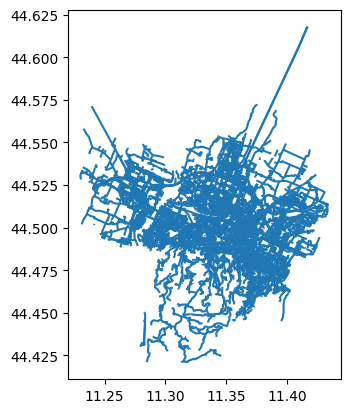

In [ ]:

driving_roads.plot()
plt.show()

## Land Cover and Land Use

In [25]:
land = gpd.read_file("../data/bologna_wikimedia.gpkg",layer="multipolygons")


In [31]:
land.columns

Index(['osm_id', 'osm_way_id', 'name', 'type', 'aeroway', 'amenity',
       'admin_level', 'barrier', 'boundary', 'building', 'craft', 'geological',
       'historic', 'land_area', 'landuse', 'leisure', 'man_made', 'military',
       'natural', 'office', 'place', 'shop', 'sport', 'tourism', 'other_tags',
       'geometry'],
      dtype='object')

In [33]:
land.landuse.unique()

array([None, 'grass', 'farmland', 'industrial', 'meadow', 'residential',
       'brownfield', 'quarry', 'railway', 'construction', 'commercial',
       'forest', 'religious', 'military', 'allotments', 'cemetery',
       'retail', 'orchard', 'recreation_ground', 'basin', 'landfill',
       'vineyard', 'garages', 'reservoir', 'depot', 'plant_nursery',
       'education', 'government', 'greenhouse_horticulture', 'greenfield',
       'flowerbed', 'planned', 'farmyard', 'civic_admin', 'proposed'],
      dtype=object)

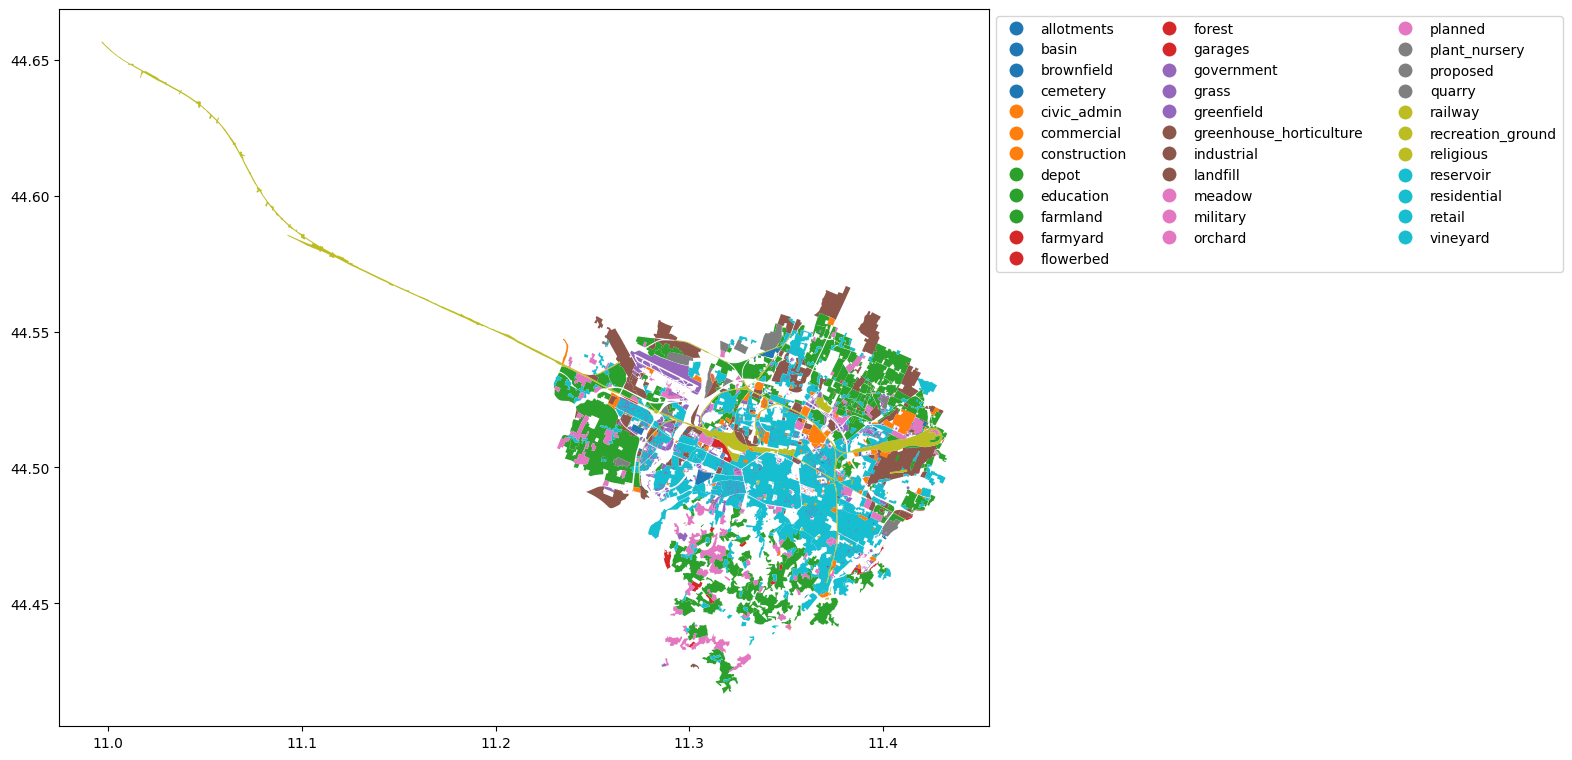

In [ ]:


ax = land.plot(column="landuse", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))
plt.show()

In [ ]:
land.dropna(subset=['landuse']).head(10).explore(tooltip=['landuse', 'name'], style_kwds=dict(color='red', fillColor='red', fillOpacity=0.5, weight=1))